In [109]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding

Fetch the MNIST dataset, with handwritten digits.

In [4]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Let's plot one example.

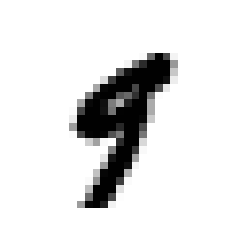

In [26]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

## PCA

Let's try to apply PCA to get 95% of the variance covered.

In [40]:
pca = PCA()
pca.fit(X)

PCA()

In [41]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

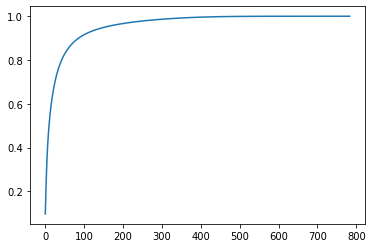

In [42]:
plt.plot(cumsum)
plt.show()

In [43]:
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [56]:
pca = PCA(n_components=0.95)
pca.fit(X)

PCA(n_components=0.95)

In [57]:
X_reduced = pca.transform(X)

In [59]:
X_recovered = pca.inverse_transform(X_reduced)

In [61]:
print(X_reduced.shape)
print(X_recovered.shape)

(70000, 154)
(70000, 784)


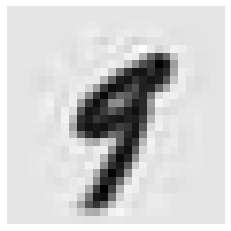

In [62]:
some_digit = X_recovered[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

## t-SNE

In [119]:
sample = np.random.choice(range(X2D.shape[0]), 5000)

In [121]:
tsne = TSNE()
%time X_reduced = tsne.fit_transform(X[sample])

/Users/pablomirallesgonzalez/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/pablomirallesgonzalez/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 2min 54s, sys: 4.5 s, total: 2min 58s
Wall time: 16.2 s


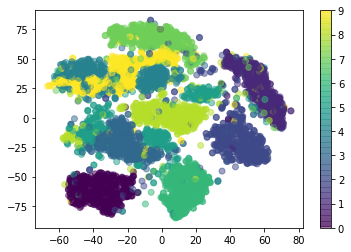

In [128]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y[sample], alpha=.5)
plt.colorbar()
plt.show()